In [4]:
#Import the libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

df = pd.read_csv('laptop_data.csv')

In [5]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Checking Errors in Data

In [97]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [98]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [6]:
print(df.shape)

(1303, 12)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


#### Finding the duplicate Values

In [8]:
print(df.duplicated().sum())

0


#### Finding the Null Values

In [9]:
print(df.isnull().sum())

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [10]:
#Drop unrequired column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Now split the Variable if It's in GB , KG

In [12]:
#Ram---
df['Ram'] = df['Ram'].str.replace('GB','')

#Weight---
df['Weight'] = df['Weight'].str.replace('kg','')

#Change data type----
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
468,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.78,90522.7200
903,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,109170.7200
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672
1046,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,78268.3200
637,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.42,13266.7200


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB
None


# EDA Process & Feature Engineering

#### Price Distriution 

C:\Users\satya\AppData\Local\Temp\ipykernel_12268\849532610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],


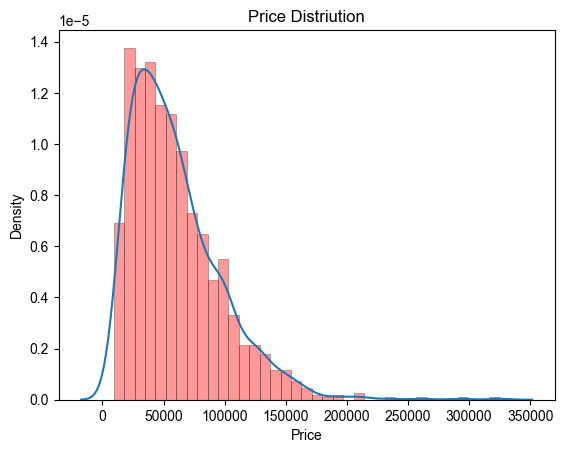

In [15]:
sns.distplot(df['Price'],
             hist_kws={'color':'red', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

##### The above show's that price range of 30k to 70k are people buy more in these price range

### Company Wise Laptop

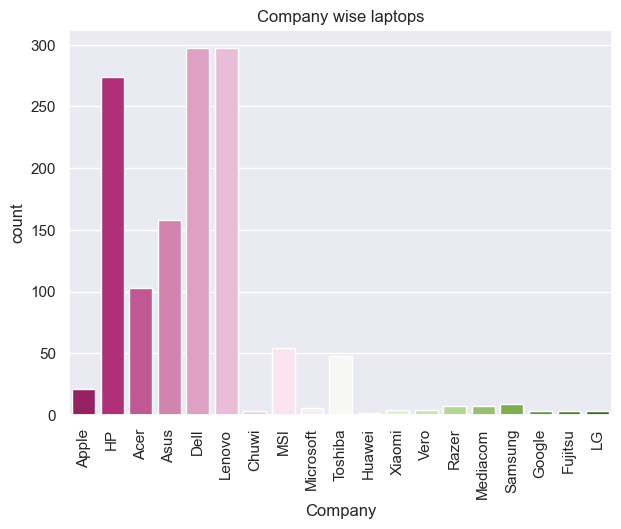

In [16]:
sns.countplot(x ='Company', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Company wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()


##### The above show's  Dell and Lenovo and HP are most popular

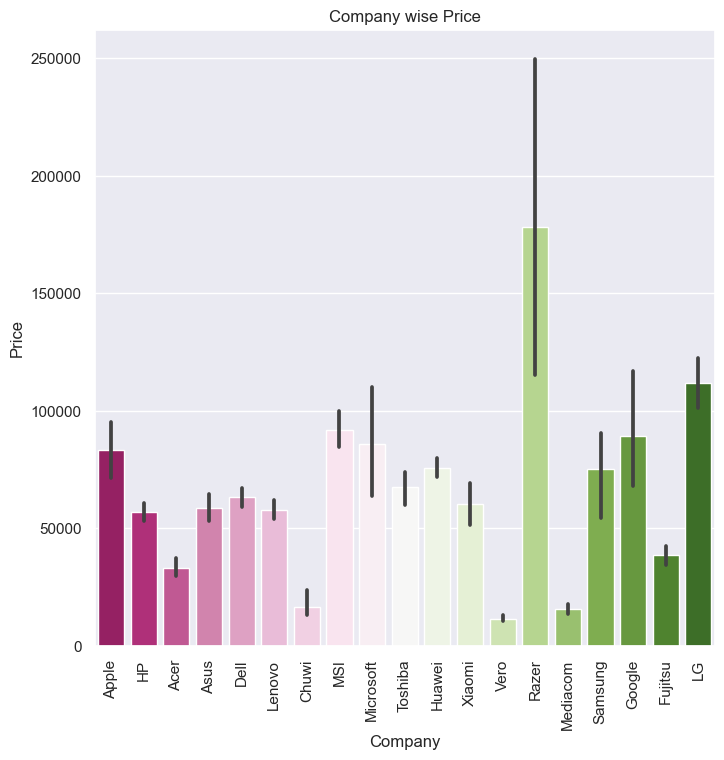

In [17]:
sns.barplot(x="Company", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("Company wise Price")
plt.show()

##### The above show's that Razer Laptop was very expensive

### Laptop TypeName  

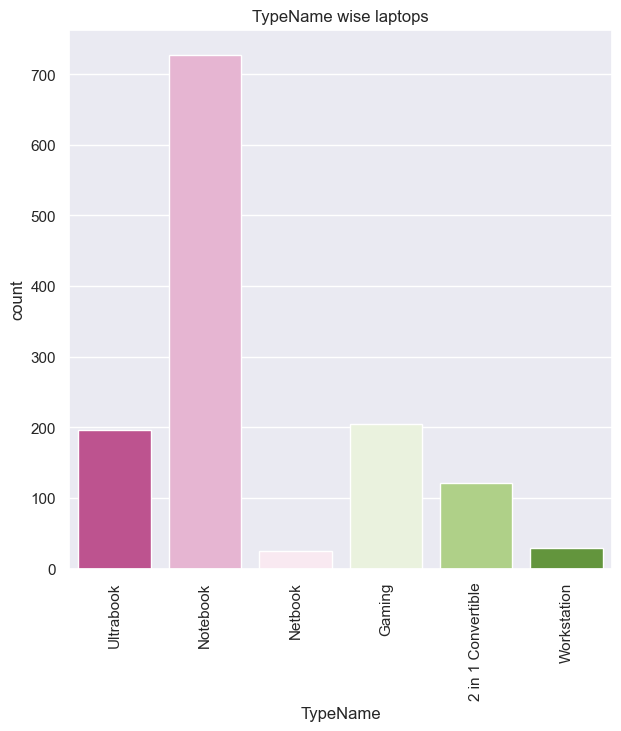

In [18]:
 
sns.countplot(x ='TypeName', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

##### The above show's that Notebook type of laptop are most popular laptop

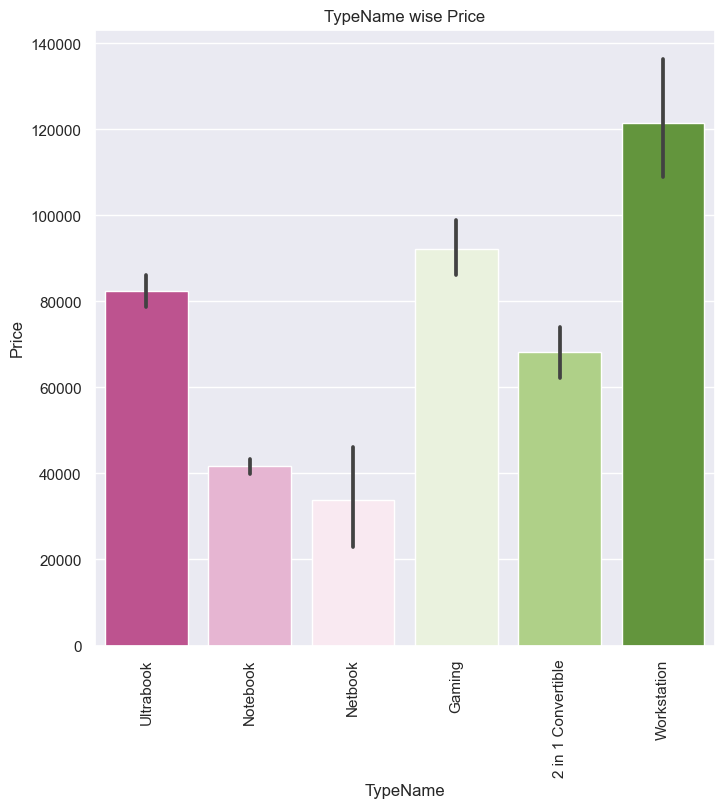

In [19]:
#TypeName with Price---------------
sns.barplot(x="TypeName", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("TypeName wise Price")
plt.show()

##### The above show's that Workstation and Gaming type of laptop are more expensive

### Work with Screen Resolution

In [20]:
print(df['ScreenResolution'].value_counts())

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [21]:
#Split the column based on Touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
55,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,40908.3840,0,0
1022,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,61218.7200,0,1
1157,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12,512GB SSD,Intel HD Graphics 520,Windows 7,1.40,122490.7200,0,0
867,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,103896.0000,1,1
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.13,139860.0000,0,1
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,94305.6000,0,1
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.2640,0,0
141,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,59461.5456,0,1
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,1
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.7200,0,0


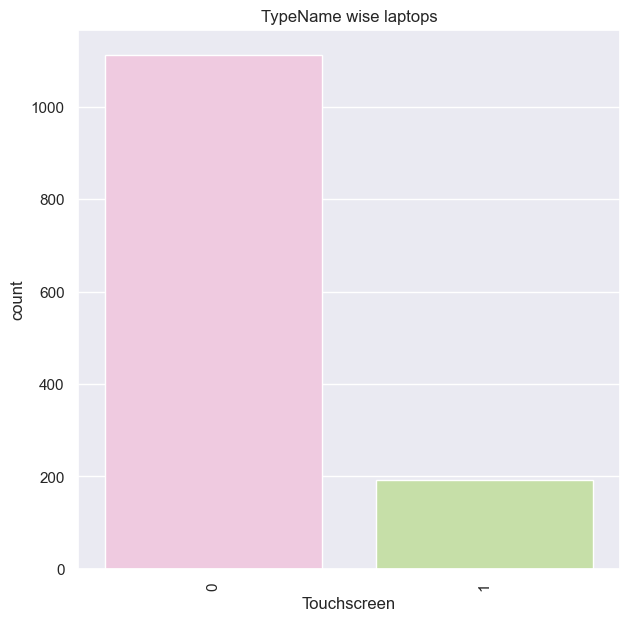

In [23]:
#Touchscreen
sns.countplot(x ='Touchscreen', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()



##### Non Touch Screen's are more in market

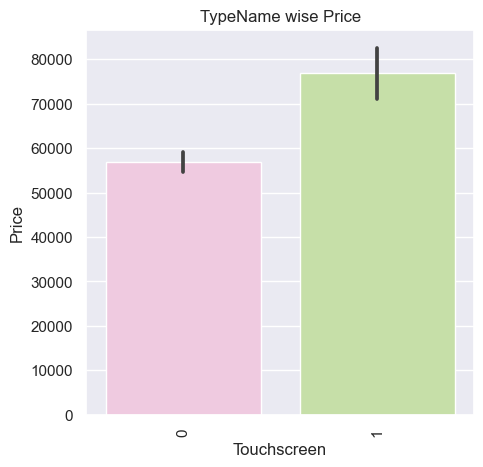

In [24]:
sns.barplot(x="Touchscreen", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("TypeName wise Price")
plt.show()


##### Touch Screen Laptop's are expensive

In [25]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [26]:
#Again split screenresolution column
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [27]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
116,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.5200,0,0,Full HD 1920,1080
1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,103842.7200,0,0,Full HD 1920,1080
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.4960,0,0,Full HD 1920,1080
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,IPS Panel Full HD 1920,1080
1221,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,78647.1408,0,0,Full HD 1920,1080


In [28]:
#Edit X-res
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [29]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
790,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX1060,Windows 10,2.24,71341.92,0,0,1920,1080
827,Dell,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,31168.80,0,0,1366,768


In [30]:
#Change data type
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


### Price

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()['Price']
print(correlation)


Inches         0.068197
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Name: Price, dtype: float64


##### Covert into PPI

In [33]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [34]:
numeric_df = ld.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()['Price']
print(correlation)


NameError: name 'ld' is not defined

In [35]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [36]:
#drop screenresolution, Inches, X_res and Y_res
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [37]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


### CPU

In [38]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [39]:
#split first 3-words 
# Because we only want the processor name
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [40]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
42,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.3,27864.9072,0,0,100.454670,Intel Core i5
781,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.3,125208.0000,0,1,127.335675,Intel Core i7


In [41]:
#CPU name extration function
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [42]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [43]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


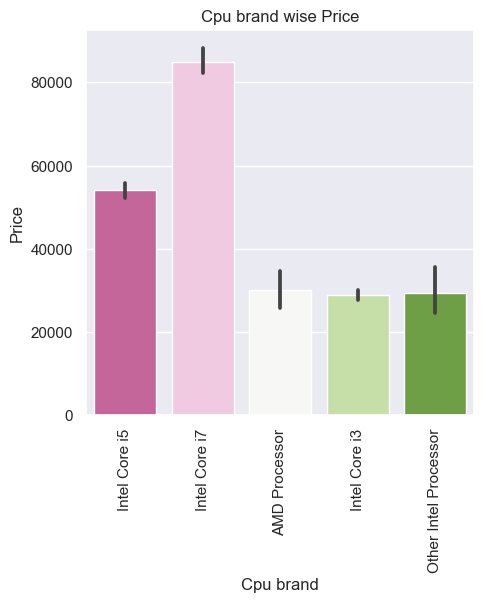

In [44]:
sns.barplot(x="Cpu brand", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Cpu brand wise Price")
plt.show()

##### i7 Processor is very Expensive

In [45]:
#drop cpu and cpu name 
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [46]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
157,Asus,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.1,70063.20,1,0,165.632118,Intel Core i5
625,Lenovo,Notebook,8,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.2,47898.72,0,0,141.211998,Intel Core i7


### Laptop RAM

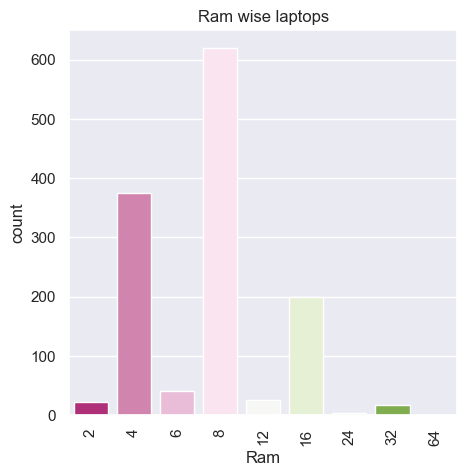

In [47]:
#RAM
sns.countplot(x ='Ram', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Ram wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

## It's clearly show that 8 gb users are more

### Laptop GPU

In [48]:
print(df['Gpu'].value_counts())

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64


In [49]:
#split first 3-words
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [50]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel


In [51]:
#drop GPU 
df.drop(columns=['Gpu'],inplace=True)

In [52]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [53]:
#drop ARM GPU
ld = df[df['Gpu Brand'] != 'ARM']

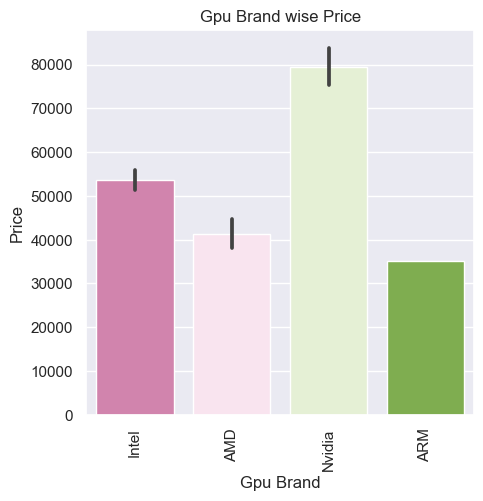

In [54]:
sns.barplot(x="Gpu Brand", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Gpu Brand wise Price")
plt.show()


#More user are from Nivida and Intel

### Operating System

In [55]:
print(df['OpSys'].value_counts())

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


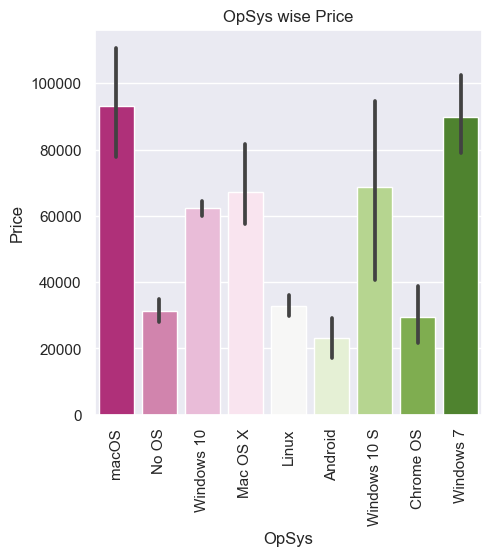

In [56]:
sns.barplot(x="OpSys", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

In [57]:
#OPs extrating function

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [58]:
df['os'] = df['OpSys'].apply(cat_os)

In [59]:
df.head(2)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac


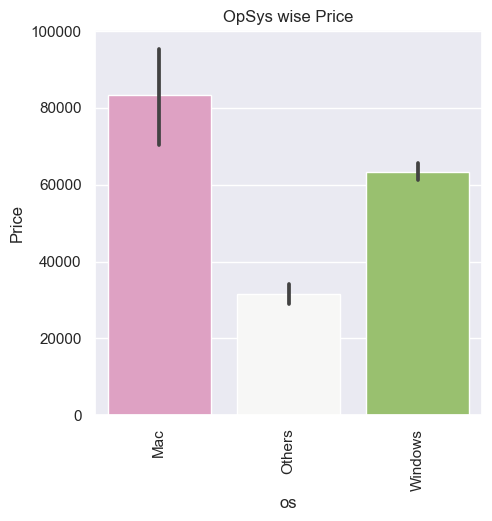

In [60]:
sns.barplot(x="os", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

##Mac users are more

In [61]:
df.drop(columns=['OpSys'],inplace=True)

In [62]:
df.sample(2)

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
72,Dell,Notebook,8,256GB SSD,2.2,46353.60,0,0,141.211998,Intel Core i7,AMD,Windows
436,HP,Notebook,4,500GB HDD,2.1,18488.16,0,0,100.454670,Other Intel Processor,Intel,Windows


###  Price Distribution

C:\Users\satya\AppData\Local\Temp\ipykernel_12268\2399194448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(ld['Price']),hist_kws={'color':'purple', 'edgecolor':'black',


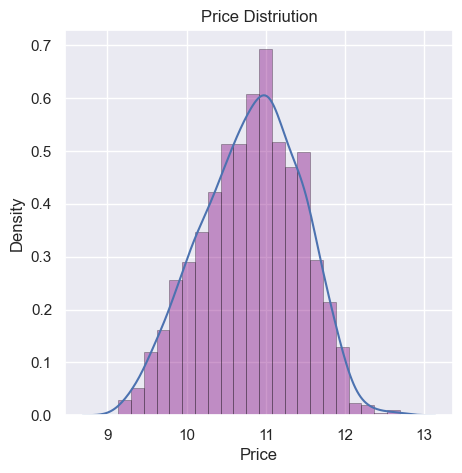

In [63]:
#Apply Log in price function
sns.distplot(np.log(ld['Price']),hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution") #It's normal distribution
plt.show()

In [64]:
df.drop(columns=['Memory'],inplace=True)

# Model Building

In [76]:
#Divide the data for x and y
X = df.drop(columns=['Price'])
y = df['Price']

In [77]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,AMD,Windows


In [78]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

### Train_Test Split

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [80]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel,Windows
699,HP,Notebook,4,2.10,0,1,141.211998,Intel Core i7,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,157.350512,Intel Core i7,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Other Intel Processor,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,Intel Core i5,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Nvidia,Others


In [81]:
X_test


,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,Intel,Windows
556,Mediacom,Notebook,4,1.35,0,1,165.632118,Other Intel Processor,Intel,Windows
693,Lenovo,2 in 1 Convertible,8,1.42,1,0,209.800683,Intel Core i7,Intel,Windows
387,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i5,AMD,Windows
781,Asus,Gaming,16,4.30,0,1,127.335675,Intel Core i7,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...
697,Asus,2 in 1 Convertible,4,1.20,1,0,176.232574,Other Intel Processor,Intel,Others
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,AMD,Others
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,Intel,Windows
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel,Windows


In [82]:
index_numbers = [X_test.columns.get_loc(col) for col in X_test]

for col, index in zip(X_test, index_numbers):
    print(f'The index number of column {col} is {index}')

The index number of column Company is 0
The index number of column TypeName is 1
The index number of column Ram is 2
The index number of column Weight is 3
The index number of column Touchscreen is 4
The index number of column Ips is 5
The index number of column ppi is 6
The index number of column Cpu brand is 7
The index number of column Gpu Brand is 8
The index number of column os is 9


In [85]:
 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear Regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(y_pred)
#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

#model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

[ 47110.06764574  17056.3084639   74342.18560306 102484.36677263
 103900.64803462  41156.00423066  54445.22860016  50254.9307827
  16614.40440617  62908.92196494  32243.5488899   63114.26853933
  90243.60044628  58121.69023963  58385.95292761  69171.78743578
  60188.22223832  78200.86058474  22660.55730938  59802.00864059
  87221.63524904  92018.06447693  15723.6273144   25233.96295525
  33378.45274092 122608.5214166   61809.00000984  26914.27362141
  25268.97966066  42773.24974629  24392.60721256  12594.40896831
  16107.12591899  57696.00572472  80389.18666467  25993.80892169
  53605.52474896  37277.27152212  58030.28986454 111067.01476252
  79421.77469733  44770.14888713  36948.01737931 114871.81960447
 100966.3443316   26919.70530998  56419.94911371  27176.71657456
  16365.40838282  28718.12619529  55151.60523081  13462.22135379
  74811.78055994  63077.32683937  62842.2878273   42079.39153366
 116801.73074573  45868.35526887  25956.43692878 114633.69662716
  63465.23924782 131502.02

c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu Brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,Intel,Windows
556,Mediacom,Notebook,4,1.35,0,1,165.632118,Other Intel Processor,Intel,Windows
693,Lenovo,2 in 1 Convertible,8,1.42,1,0,209.800683,Intel Core i7,Intel,Windows
387,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i5,AMD,Windows
781,Asus,Gaming,16,4.30,0,1,127.335675,Intel Core i7,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...
697,Asus,2 in 1 Convertible,4,1.20,1,0,176.232574,Other Intel Processor,Intel,Others
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,AMD,Others
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,Intel,Windows
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel,Windows


In [92]:
new_data = pd.DataFrame({
    'Company': ["HP"],
    'TypeName': ["Workstation"],
    'Ram': [8],
    'Weight': [1.49],
    'Touchscreen': [0],
    'Ips': [1],
    'ppi': [166.65],
    'Cpu brand': ["Intel Core i7"],
    'Gpu Brand': ["Intel"],
    'os': ["Windows"]
    
})

predicted_price = pipe.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 117810.3581233228


# KNN Regression

In [414]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['KNN Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 82.28%
MAE : 19.56%
MSE : 6.76%


c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# DecisionTree Regression

In [421]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['DecisionTree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 81.81%
MAE : 19.55%
MSE : 6.94%


c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# SVR Regression

In [416]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SVR Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score : 84.74%
MAE : 18.91%
MSE : 5.82%


# RandomForest Regression

In [417]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.10,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

#model_comparison['RandomForest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score : 88.36%
MAE : 16.20%
MSE : 4.44%


# AdaBoost Regression

In [418]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['AdaBoost Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 78.36%
MAE : 23.53%
MSE : 8.26%


c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# GradientBoosting Regression

In [94]:
import joblib

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

#accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
#print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

# Save the trained model to a file
model_filename = 'gradient_boosting_model.pkl'
joblib.dump(pipe, model_filename)

#model_comparison['GradientBoosting Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score : 82.63%
MAE : 935668.14%
MSE : 19343482113.27%


['gradient_boosting_model.pkl']

# XGB Regression

In [420]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")



R2 Score : 88.56%
MAE : 16.11%
MSE : 4.37%


c:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
